# Histogram Equalization

### imports

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### Read Image

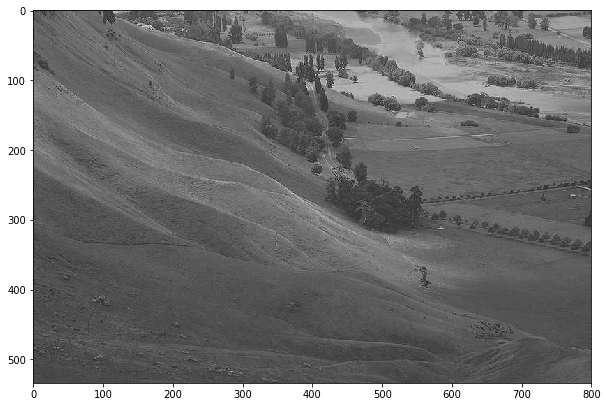

In [2]:
image_path = '../images/hawkes.jpg'

img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,10))
plt.imshow(gray, cmap='gray')
plt.show()

### Histogram

In [3]:
def histogram(gray, G):
    hist = np.zeros(G)
    for row in gray:
        for pixel in row:       
            hist[pixel]+=1
    return hist

In [4]:
G = 256
hist = histogram(gray, G)

### Plot Histogram

In [5]:
def plot_histogram(hist, width=0.5, figsize=(15,5), 
                   xlabel='Intensity', ylabel='Color', 
                   title='Histogram'):
    plt.figure(figsize=figsize)
    plt.bar(list(range(len(hist))),hist,width=width)
    plt.ylabel(xlabel)
    plt.xlabel(ylabel)
    plt.title(title)

    plt.show()

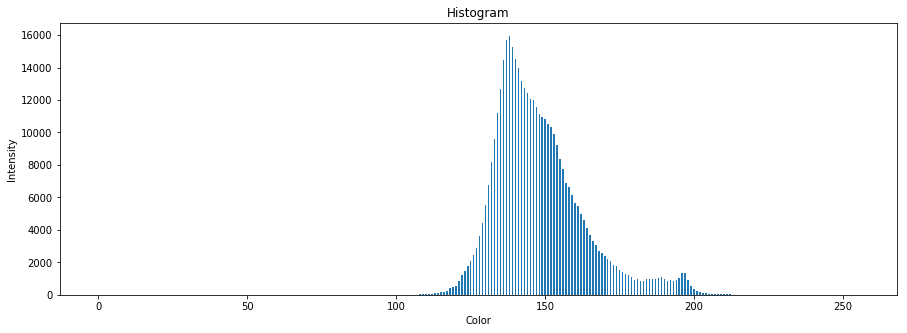

In [6]:
plot_histogram(hist)

### Cumulative Histogram

In [7]:
hist_cum = hist.copy()
for i in range(1,G):
    hist_cum[i]+=hist_cum[i-1]

### Plot Cumulative Histogram

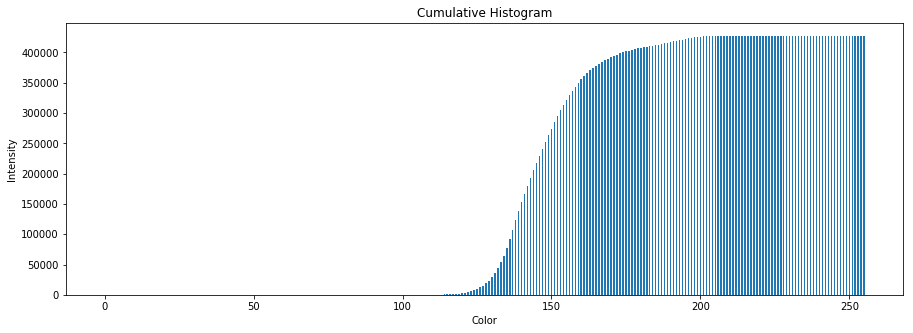

In [8]:
plot_histogram(hist_cum,title='Cumulative Histogram')

### Equalization

In [9]:
N = gray.shape[0] #rows / height
M = gray.shape[1] #columns / width
t = np.round(((G-1)/(N*M))*hist_cum)

In [10]:
output = gray.copy()

for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
        output[i,j] = t[output[i,j]]

### Draw Equalized Image

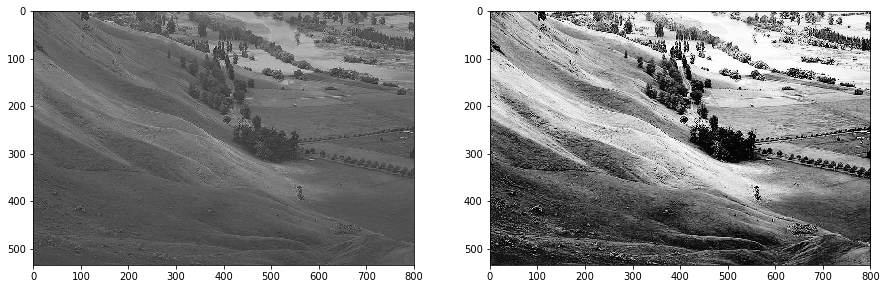

In [11]:
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(gray, cmap='gray')
plt.subplot(122),plt.imshow(output, cmap='gray')
plt.show()

### Plot Equalized Histogram

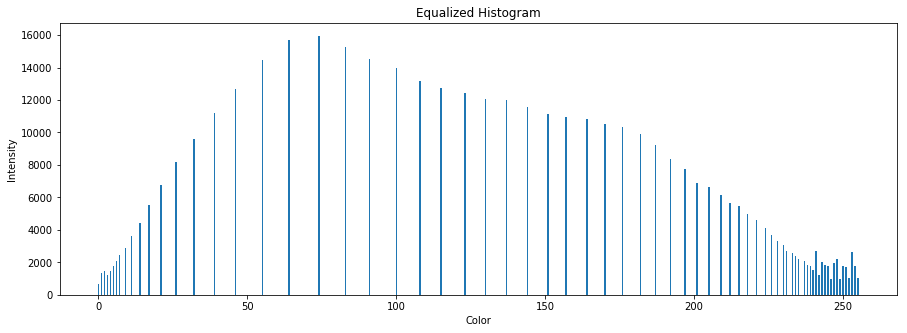

In [12]:
hist_after = histogram(output, G)
plot_histogram(hist_after, title="Equalized Histogram")

### Plot Equalized Cumulative Histogram

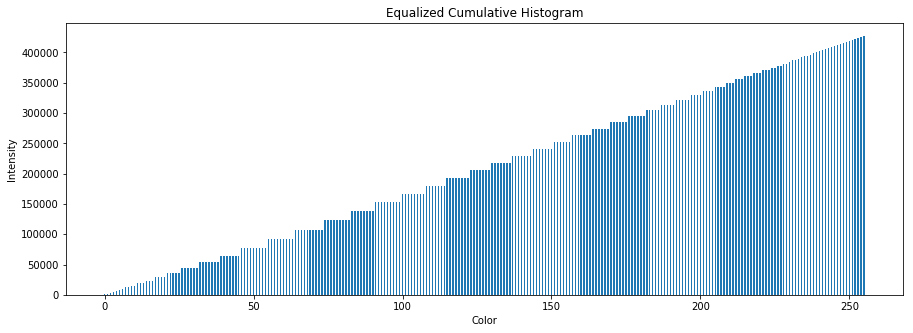

In [14]:
hist_cum_after = hist_after.copy()
for i in range(1,len(hist)):
    hist_cum_after[i]+=hist_cum_after[i-1]
plot_histogram(hist_cum_after, title="Equalized Cumulative Histogram")